In [3]:
import csv
import subprocess
import os 
import pandas as pd
import io 
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import kpss, adfuller

from glob import glob


In [6]:
# ipath = 'D:/vitaldb/first_filtered/ORC2_210907_112029.vital'
ipath_files = glob('D:/vitaldb/first_filtered/*.vital')

<AxesSubplot:>

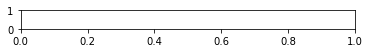

In [11]:
plt.subplot(10, 1, 1)

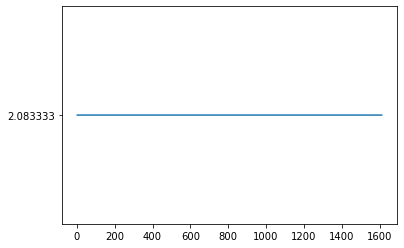

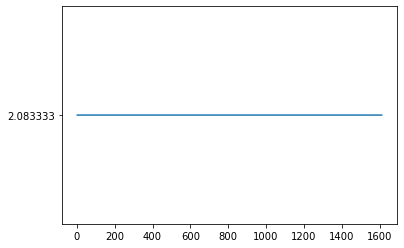

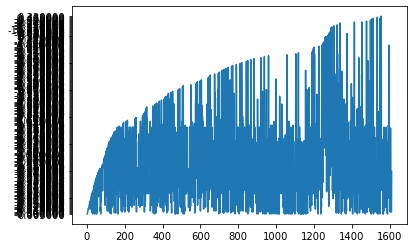

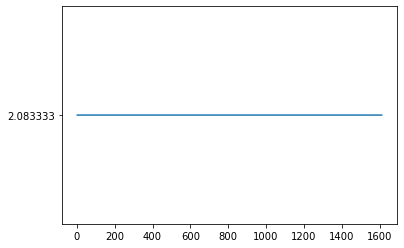

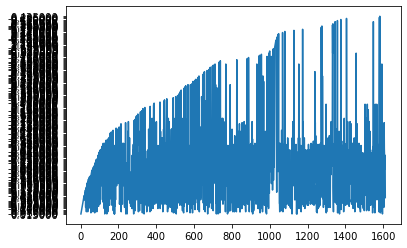

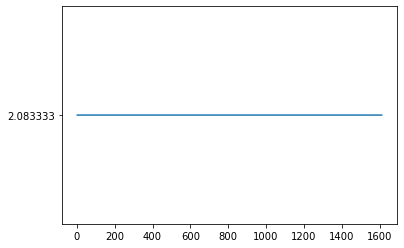

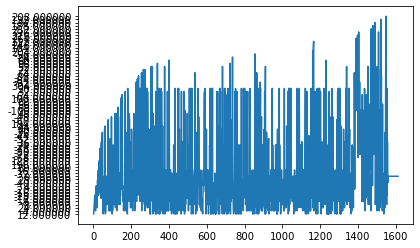

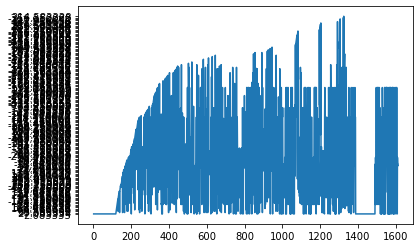

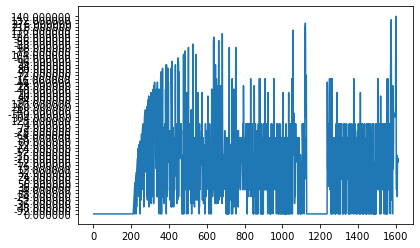

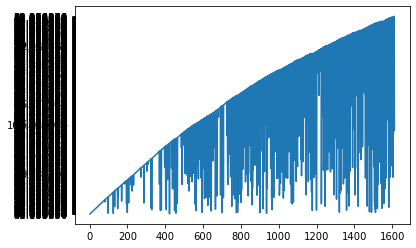

In [14]:
# ipath = 'D:/vitaldb/first_filtered/ORC2_210907_112029.vital'
# ipath = 'D:/Dropbox/WORK/SNUH/vitaldb/first_filtered/ORC2_210907_112029.vital'

N = 10

for idx, ipath in enumerate(ipath_files[:N]):
    # print(idx)
    
    interval = 1
    p = subprocess.Popen('vital_recs.exe -h "{}" {}'.format(ipath, interval), stdout=subprocess.PIPE)
    output = p.communicate()[0].decode("utf-8")

    colums = []
    data = [] 
    
    for idx, row in enumerate(csv.reader(output.splitlines())):
        
        if idx == 0:
            colums.extend(row) 
        else:
            data.append(row)
        
    df = pd.DataFrame(data, columns=colums)
    
    # plt.subplot(N, 1, idx+1)
    plt.plot(df.iloc[2:1612, 6])
    # plt.plot(df.iloc[:, 6], label='PLENTH')
    plt.show()
    
# plt.show() 

In [15]:
ipath_files[:N]

['D:/vitaldb/first_filtered\\ORC12_210426_083916.vital',
 'D:/vitaldb/first_filtered\\ORC12_210426_103152.vital',
 'D:/vitaldb/first_filtered\\ORC12_210426_152448.vital',
 'D:/vitaldb/first_filtered\\ORC12_210426_181234.vital',
 'D:/vitaldb/first_filtered\\ORC12_210427_084235.vital',
 'D:/vitaldb/first_filtered\\ORC12_210427_133015.vital',
 'D:/vitaldb/first_filtered\\ORC12_210428_084108.vital',
 'D:/vitaldb/first_filtered\\ORC12_210428_154159.vital',
 'D:/vitaldb/first_filtered\\ORC12_210429_083825.vital',
 'D:/vitaldb/first_filtered\\ORC12_210429_134935.vital']

In [16]:
ipath = 'D:/vitaldb/first_filtered\\ORC12_210429_083825.vital'
# ipath = 'D:/Dropbox/WORK/SNUH/vitaldb/first_filtered/ORC2_210907_112029.vital'
interval = 1
p = subprocess.Popen('vital_recs.exe -h "{}" {}'.format(ipath, interval), stdout=subprocess.PIPE)
output = p.communicate()[0].decode("utf-8")

# p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
# df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')
# for idx, val in df.iterrows():
#     print(idx)
colums = []
data = [] 
# df = pd.DataFrame()
for idx, row in enumerate(csv.reader(output.splitlines())):
    
    if idx == 0:
        colums.extend(row) 
    else:
        data.append(row)
    
df = pd.DataFrame(data, columns=colums)
df    
# colums

,Time,EEG_L1,EEG_L2,EEG_R1,EEG_R2,EEG_L,EEG_R,PLETH,ECG_HR,ECG_II,...,HR,CO,CI,SVV,SV,SVI,ASBP,ADBP,BT_ESOPH,ORI
0,0.000000,2.083333,2.083333,2.083333,2.083333,0.000000,0.000000,0.000000,,0.055000,...,,,,,,,,,,
1,1.000000,2.083333,2.083333,2.083333,2.083333,0.000000,0.000000,0.000000,,0.065000,...,,,,,,,,,,
2,2.000000,2.083333,2.083333,2.083333,2.083333,0.000000,0.000000,0.000000,61.000000,0.010000,...,,,,,,,,,,
3,3.000000,2.083333,2.083333,2.083333,2.083333,0.000000,0.000000,0.000000,61.000000,-0.005000,...,,,,,,,,,,
4,4.000000,2.083333,2.083333,2.083333,2.083333,0.000000,0.000000,0.000000,61.000000,-0.000000,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17795,17795.000000,,,,,,,,,,...,,,,,,,,,,
17796,17796.000000,,,,,,,,,,...,,,,,,,,,,
17797,17797.000000,,,,,,,,,,...,,,,,,,,,,
17798,17798.000000,,,,,,,,,,...,,,,,,,,,,


In [17]:
# PLEHTH
df.iloc[2:1612, [0, 6]]

,Time,EEG_R
2,2.000000,0.000000
3,3.000000,0.000000
4,4.000000,0.000000
5,5.000000,0.000000
6,6.000000,0.000000
...,...,...
1607,1607.000000,-24.000000
1608,1608.000000,-20.000000
1609,1609.000000,-12.000000
1610,1610.000000,-20.000000


In [19]:
df.loc[4:1313, 'ECG_HR']

4       66.000000
5       67.000000
6       68.000000
7       68.000000
8       70.000000
          ...    
1309    87.000000
1310    85.000000
1311    83.000000
1312    83.000000
1313    83.000000
Name: ECG_HR, Length: 1310, dtype: object

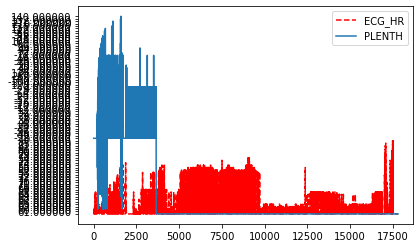

In [19]:
# df.head() 
# len(df['ECG_HR'])
# plt.figure(figsize=(40, 20))
plt.plot(df['ECG_HR'], 'r--', label='ECG_HR')
plt.plot(df.iloc[:, 6], label='PLENTH')
plt.legend() 
plt.show()
# plt.plot(df.iloc[:, 6])

In [25]:
# df.shape
# df.loc[:300, 'ECG_HR']
# sample_df = df.iloc[:, ['Time', 'ECG_HR']]
sample_df = df.iloc[2:1612, [0, 6]]
ecg_df = df.loc[4:1313, ['Time', 'ECG_HR']]

In [9]:
# type(sample_df)
# sample_df = sample_df.set_index('Time', inplace=True)
sample_df = sample_df.set_index(keys=['Time'], inplace=False, drop=True)
sample_df

,PLETH
Time,
2.000000,62.759464
3.000000,70.525032
4.000000,29.621490
5.000000,45.299145
6.000000,51.623932
...,...
1607.000000,50.012211
1608.000000,50.012211
1609.000000,50.012211


In [30]:
ecg_df = ecg_df.set_index(keys=['Time'], inplace=False, drop=True)
ecg_df

,ECG_HR
Time,
4.000000,66.000000
5.000000,67.000000
6.000000,68.000000
7.000000,68.000000
8.000000,70.000000
...,...
1309.000000,87.000000
1310.000000,85.000000
1311.000000,83.000000


In [10]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
adf_test(sample_df)

Results of Dickey-Fuller Test:
Test Statistic                -7.569360e+00
p-value                        2.868560e-11
#Lags Used                     2.500000e+01
Number of Observations Used    1.584000e+03
Critical Value (1%)           -3.434485e+00
Critical Value (5%)           -2.863366e+00
Critical Value (10%)          -2.567742e+00
dtype: float64


In [12]:
def kpss_test(timeseries): 
    print("Results of KPSS Test:") 
    kpsstest = kpss(timeseries, regression="c", nlags="auto") 
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"] ) 
    
    for key, value in kpsstest[3].items(): 
        kpss_output["Critical Value (%s)" % key] = value 
    print(kpss_output)
    
kpss_test(sample_df)

Results of KPSS Test:
Test Statistic            0.325392
p-value                   0.100000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [17]:
sample_df.info()
# sample_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 2.000000 to 1611.000000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PLETH   1610 non-null   object
dtypes: object(1)
memory usage: 25.2+ KB


In [29]:
# sample_df.info()
test_df = sample_df.astype({'PLETH': np.float64})

In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 2.000000 to 1611.000000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLETH   1610 non-null   float64
dtypes: float64(1)
memory usage: 89.7+ KB


In [34]:
# sample_df['r_PLETH'] = sample_df['PLETH'].pct_change()
# sample_df
df_vst = np.log(test_df.PLETH)
# df_vst.head()
df_vst

Time
2.000000       4.139309
3.000000       4.255968
4.000000       3.388500
5.000000       3.813288
6.000000       3.943985
                 ...   
1607.000000    3.912267
1608.000000    3.912267
1609.000000    3.912267
1610.000000    3.912267
1611.000000    3.912267
Name: PLETH, Length: 1610, dtype: float64

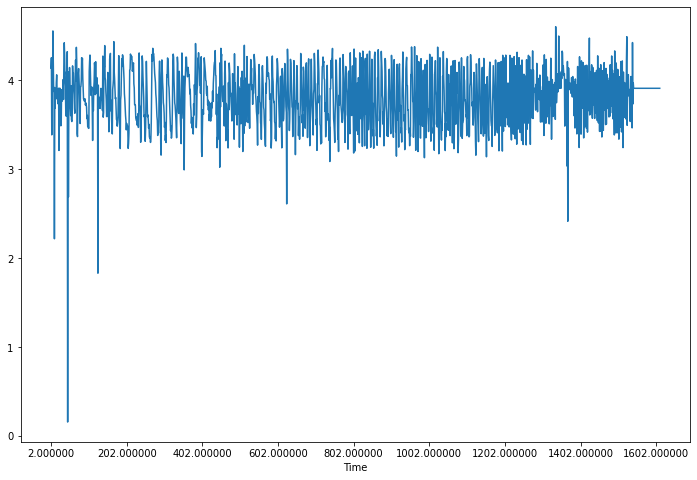

In [35]:
df_vst.plot(figsize=(12, 8))
plt.show()

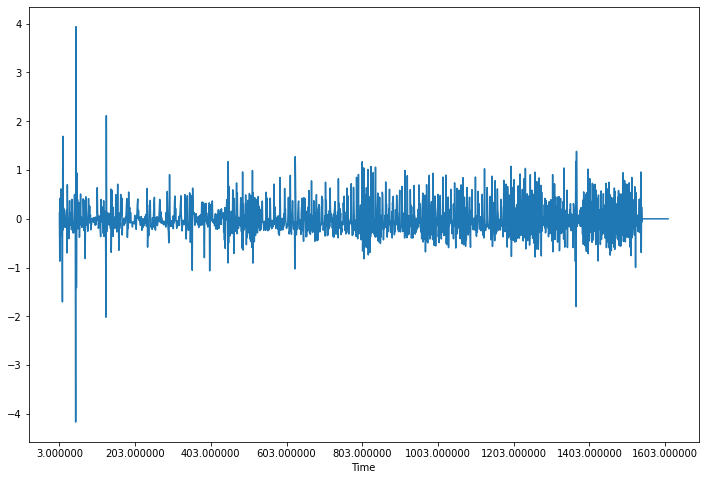

In [37]:
df_vst_diff1 = df_vst.diff(1).dropna()

df_vst_diff1.plot(figsize=(12, 8))
plt.show()

In [38]:
kpss_test(df_vst_diff1)

Results of KPSS Test:
Test Statistic             0.054576
p-value                    0.100000
Lags Used                117.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


c:\Users\krsty\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


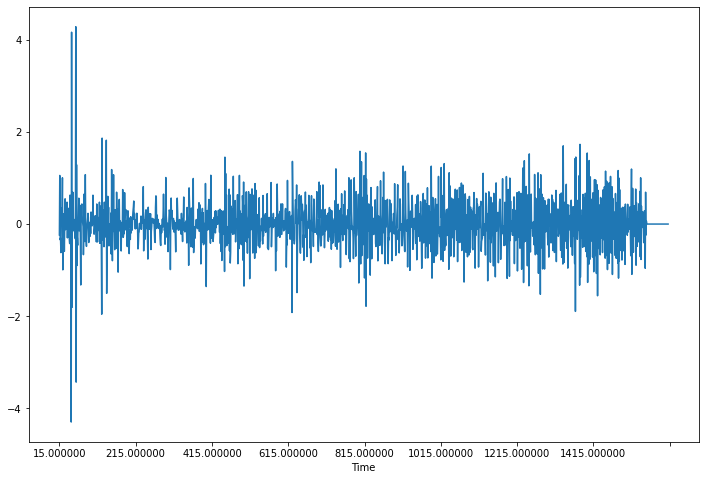

In [39]:
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()

df_vst_diff1_diff12.plot(figsize=(12, 8))
plt.show()

In [11]:
# sample_df.iloc[:10, 0]
values_sample_df = sample_df.values
values_sample_df

array([['2.000000', '62.759464'],
       ['3.000000', '70.525032'],
       ['4.000000', '29.621490'],
       ...,
       ['1609.000000', '50.012211'],
       ['1610.000000', '50.012211'],
       ['1611.000000', '50.012211']], dtype=object)

In [13]:
# sample_data = values_sample_df[5:1314]

fixed_sample_data = [] 
for idx, val in enumerate(values_sample_df):
    if val[1] == '':
        fixed_sample_data.append(values_sample_df[idx-1, :].astype(np.float32).tolist())
    else:
        fixed_sample_data.append(val.astype(np.float32).tolist())
        

In [14]:
# fixed_sample_data = fixed_sample_data.astype(np.float32)
# fixed_sample_data.tolist()
# sample_data[idx-1, :].astype(np.float32).tolist()
fixed_sample_data = np.array(fixed_sample_data)


In [15]:
fixed_sample_data

array([[   2.        ,   62.75946426],
       [   3.        ,   70.52503204],
       [   4.        ,   29.62149048],
       ...,
       [1609.        ,   50.01221085],
       [1610.        ,   50.01221085],
       [1611.        ,   50.01221085]])

In [49]:
# df_vst_diff1[:10].index
df_vst_diff1[:10].values

array([ 0.11665832, -0.8674676 ,  0.42478805,  0.13069721,  0.61341979,
       -0.33847217, -0.34144331,  0.04497922, -1.70257554,  1.69286196])

In [55]:
def split_xy(dataset, timesteps, y_column):
    x, y = list(), list() 
    
    for i in range(len(dataset)):
        x_end_number = i + timesteps
        y_end_number = x_end_number + y_column
        
        if y_end_number > len(dataset):
            break 
        
        # tmp_x = dataset[i:x_end_number, 0]
        # tmp_y = dataset[x_end_number:y_end_number, 1]
        tmp_x = dataset[i:x_end_number].index
        tmp_y = dataset[x_end_number:y_end_number].values
        print(tmp_y.shape)
        
        x.append(tmp_x)
        y.append(tmp_y)
        
    return np.array(x), np.array(y)
        


In [ ]:
# x, y = split_xy(fixed_sample_data, 10, 1)
x, y = split_xy(df_vst_diff1, 10, 1)
x, y


In [52]:
ecg_df[1:10].values.shape 

(9, 1)

In [56]:
x, y = split_xy(ecg_df, 10, 1)
x, y

(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)

(array([['4.000000', '5.000000', '6.000000', ..., '11.000000',
         '12.000000', '13.000000'],
        ['5.000000', '6.000000', '7.000000', ..., '12.000000',
         '13.000000', '14.000000'],
        ['6.000000', '7.000000', '8.000000', ..., '13.000000',
         '14.000000', '15.000000'],
        ...,
        ['1301.000000', '1302.000000', '1303.000000', ..., '1308.000000',
         '1309.000000', '1310.000000'],
        ['1302.000000', '1303.000000', '1304.000000', ..., '1309.000000',
         '1310.000000', '1311.000000'],
        ['1303.000000', '1304.000000', '1305.000000', ..., '1310.000000',
         '1311.000000', '1312.000000']], dtype=object),
 array([[['68.000000']],
 
        [['68.000000']],
 
        [['68.000000']],
 
        ...,
 
        [['83.000000']],
 
        [['83.000000']],
 
        [['83.000000']]], dtype=object))

In [54]:
x.shape, y.shape
# len(y)
# y.shape


((1300, 10), (1300, 1, 1))

In [35]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=1, test_size=0.3
)

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((910, 10), (910, 1, 1), (390, 10), (390, 1, 1))

In [37]:
# x_train = np.reshape(x_train, ())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled, x_test_scaled

(array([[ 1.29072013,  1.29072013,  1.29072013, ...,  1.29072013,
          1.29072013,  1.29072013],
        [ 1.05145606,  1.05145606,  1.05145606, ...,  1.05145606,
          1.05145606,  1.05145606],
        [-0.75897544, -0.75897544, -0.75897544, ..., -0.75897544,
         -0.75897544, -0.75897544],
        ...,
        [ 1.16577111,  1.16577111,  1.16577111, ...,  1.16577111,
          1.16577111,  1.16577111],
        [-1.12318854, -1.12318854, -1.12318854, ..., -1.12318854,
         -1.12318854, -1.12318854],
        [ 1.07272397,  1.07272397,  1.07272397, ...,  1.07272397,
          1.07272397,  1.07272397]]),
 array([[ 1.20033148,  1.20033148,  1.20033148, ...,  1.20033148,
          1.20033148,  1.20033148],
        [-0.76429242, -0.76429242, -0.76429242, ..., -0.76429242,
         -0.76429242, -0.76429242],
        [-0.2272775 , -0.2272775 , -0.2272775 , ..., -0.2272775 ,
         -0.2272775 , -0.2272775 ],
        ...,
        [-0.93443577, -0.93443577, -0.93443577, ..., -

In [38]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_shape=(10, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [39]:
x_train_scaled.shape, y_train.shape

((910, 10), (910, 1, 1))

In [40]:
# y_train = y_train.tolist()
y_train.shape

(910, 1, 1)

In [41]:
from keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

early_stopping = EarlyStopping(patience=20) 
model.fit(x_train_scaled, 
          y_train, 
          validation_split=0.2,
          verbose=1, 
          batch_size=1, 
          epochs=100, 
          callbacks=[early_stopping])

Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "c:\ProgramData\Miniconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\ProgramData\Miniconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\ProgramData\Miniconda3\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\ProgramData\Miniconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\ProgramData\Miniconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\ProgramData\Miniconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\ProgramData\Miniconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "c:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "c:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "c:\ProgramData\Miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "c:\ProgramData\Miniconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\ProgramData\Miniconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31732\385295072.py", line 6, in <cell line: 6>
      model.fit(x_train_scaled,
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\engine\training.py", line 864, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\engine\training.py", line 957, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\engine\compile_utils.py", line 459, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\metrics.py", line 178, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "c:\ProgramData\Miniconda3\lib\site-packages\keras\metrics.py", line 720, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_907]

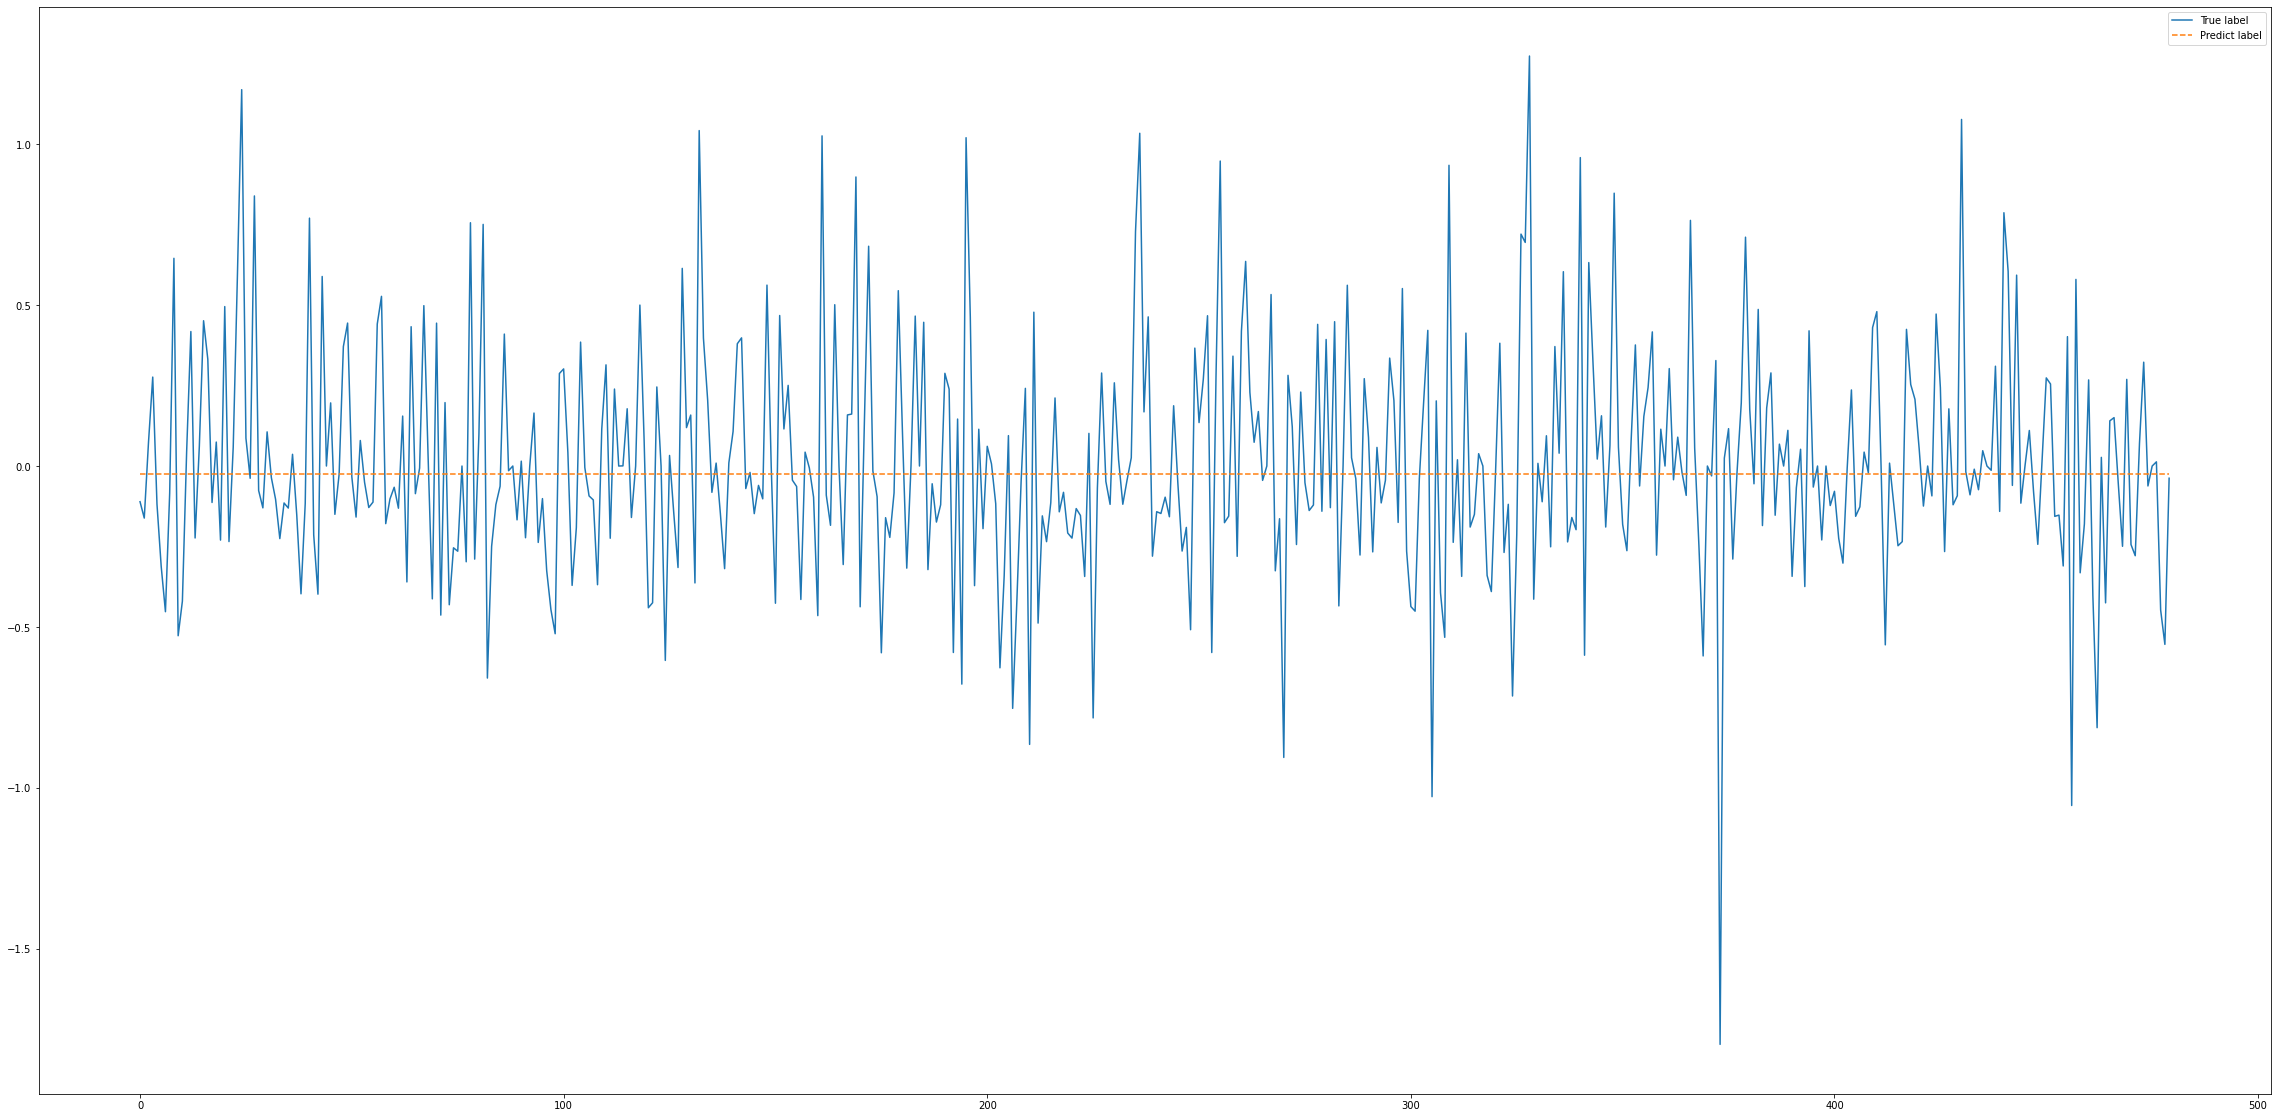

In [60]:
y_pred = model.predict(x_test_scaled)

# y_pred_values = [] 
# for i in range(5):
#     print()

plt.figure(figsize=(40, 20))
plt.plot(y_test, label='True label')
plt.plot(y_pred, '--', label='Predict label')
plt.legend()
plt.show()

In [29]:
x_train_scaled

array([[ 1.5671194 ,  1.5671194 ,  1.5671194 , ...,  1.5671194 ,
         1.5671194 ,  1.5671194 ],
       [ 1.02677481,  1.02677481,  1.02677481, ...,  1.02677481,
         1.02677481,  1.02677481],
       [ 0.2342694 ,  0.2342694 ,  0.2342694 , ...,  0.2342694 ,
         0.2342694 ,  0.2342694 ],
       ...,
       [-0.83441213, -0.83441213, -0.83441213, ..., -0.83441213,
        -0.83441213, -0.83441213],
       [ 1.12283607,  1.12283607,  1.12283607, ...,  1.12283607,
         1.12283607,  1.12283607],
       [-1.25468015, -1.25468015, -1.25468015, ..., -1.25468015,
        -1.25468015, -1.25468015]])

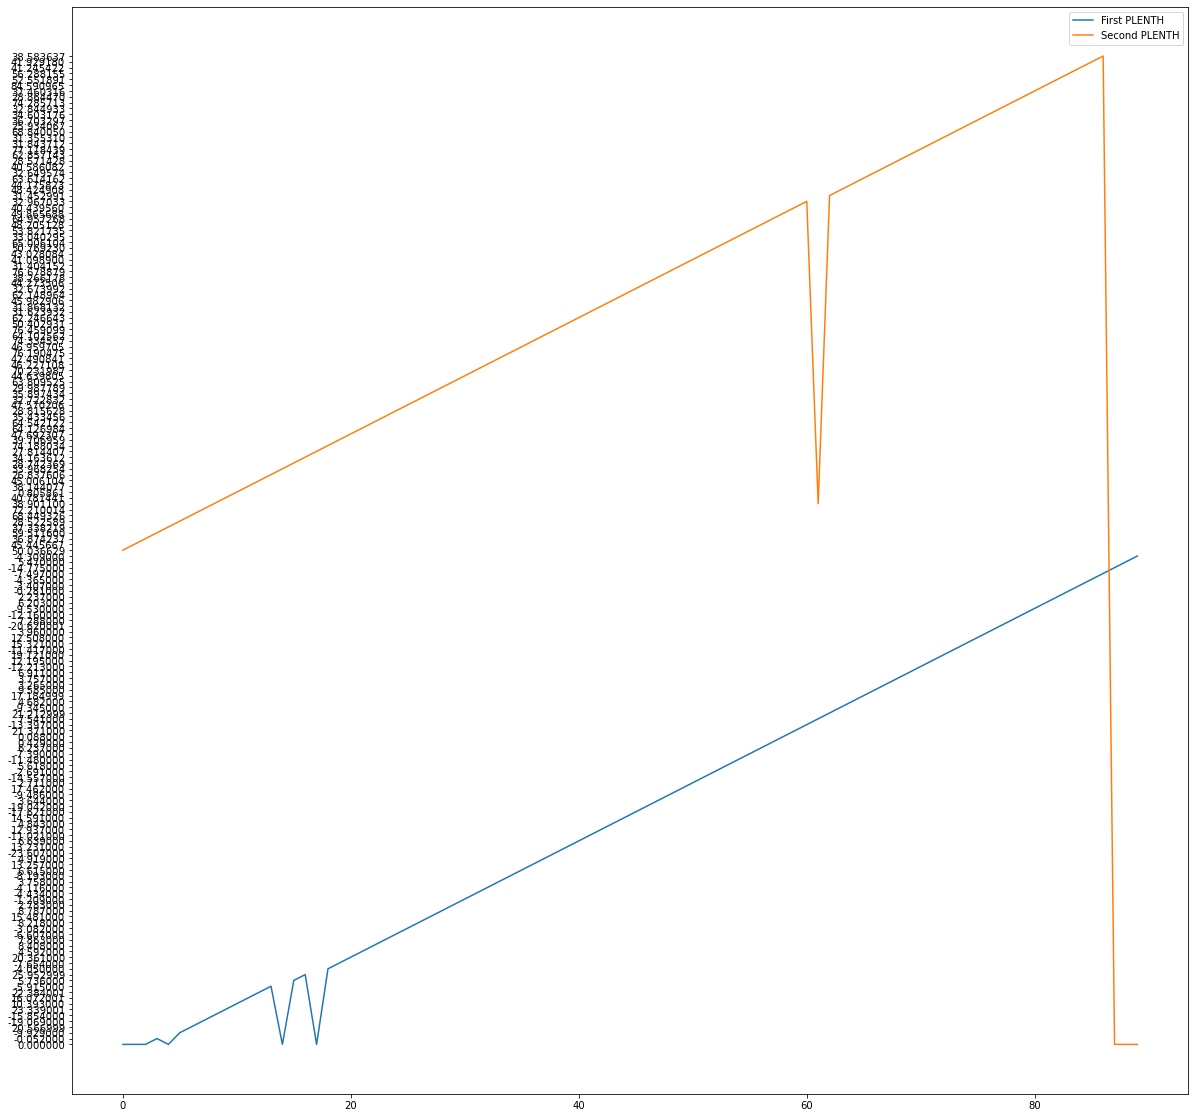

In [12]:
plt.figure(figsize=(20, 20))
plt.plot(df.iloc[:, 1], label='First PLENTH')
plt.plot(df.iloc[:, 3], label='Second PLENTH')
plt.legend()
plt.show()

<AxesSubplot:>

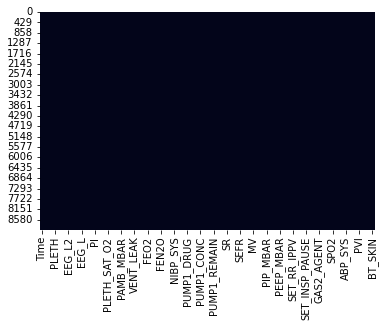

In [3]:
# df.isnull()
import seaborn as sns 

sns.heatmap(df.isnull(), cbar=False)

In [41]:
df[df['ECG_II'] == ''], df[df['CO2'] == '']

(             Time       PLETH ECG_II     PLETH        CO2      EEG_L1  \
 490    490.000000   -9.495000                    1.200000  -31.250000   
 4092  4092.000000  -10.176000                   36.099998   10.416667   
 7694  7694.000000   -7.336000                   31.500000  -14.583333   
 8700  8700.000000  -14.775000         0.000000   0.000000    2.083333   
 8701  8701.000000   32.768002         0.000000   0.000000    2.083333   
 ...           ...         ...    ...       ...        ...         ...   
 8984  8984.000000   -0.399000         0.000000   0.000000    2.083333   
 8985  8985.000000    1.347000         0.000000   0.000000    2.083333   
 8986  8986.000000    1.776000         0.000000               2.083333   
 8987  8987.000000    5.395000                                2.083333   
 8988  8988.000000    3.708000                                           
 
           EEG_L2      EEG_R1      EEG_R2       EEG_L  ...        SPO2  \
 490   -35.416668  -22.916666  -43.7

In [21]:
type(df.loc[0, 'Time'])

numpy.float64

In [24]:
df = df.fillna(0)

In [41]:
# pd.save_csv(df)
# df.save
df.to_csv('test.csv')

In [45]:
# rootdir = r"//Vitalnew/vital_data/Monthly_Confirmed/SNUH_OR"
rootdir = r'D:/first_filtered/'

for dir, dirs, files in os.walk(rootdir):
    
    for file in files[:10]:
        ipath = '{}/{}'.format(dir, file)
        cmd = 'vital_trks {}'.format(ipath)
        p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
        df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')

        devs = []
        for index, row in df.iterrows():
            if row['tname'] != 'SVV':
                continue

            devs.append(row['dname'])


        if not devs:
            continue
        
        if type(devs) == 'float':
            print(devs)
        # print(devs)
        # print('{},{}'.format(ipath[len(rootdir)+1:], ','.join(devs)))

In [18]:
# devs
df.describe()

,Time,PLETH,ECG_II,PLETH,CO2,EEG_L1,EEG_L2,EEG_R1,EEG_R2,EEG_L,...,SPO2,BPM,ABP,ABP_SYS,ABP_DIA,HR,PVI,SET_FLOW_TRIG,PPV,BT_SKIN
count,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989,...,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989
unique,8989,7608,336,2322,421,124,160,159,140,86,...,7,44,1142,57,47,64,31,2,21,197
top,0.000000,0.000000,-0.044999,0.000000,0.000000,2.083333,2.083333,2.083333,2.083333,0.000000,...,99.000000,,,,,,,,,
freq,1,612,350,270,745,1490,1192,1490,1190,1716,...,5517,1119,732,1410,1410,1435,1544,7128,2124,4302
